# Exercise
# Supervised classification of satallite image

## 1. Loading data

In [1]:
from skimage import io

coll = io.ImageCollection(r'C:\Users\shado\Desktop\WUT\Image Recognition and Deep Machine Learning\New project\data'+'\k*.tif')
coll.files

<>:3: SyntaxWarning: invalid escape sequence '\k'
<>:3: SyntaxWarning: invalid escape sequence '\k'
C:\Users\shado\AppData\Local\Temp\ipykernel_6720\706577805.py:3: SyntaxWarning: invalid escape sequence '\k'
  coll = io.ImageCollection(r'C:\Users\shado\Desktop\WUT\Image Recognition and Deep Machine Learning\New project\data'+'\k*.tif')


['C:\\Users\\shado\\Desktop\\WUT\\Image Recognition and Deep Machine Learning\\New project\\data\\k1.tif',
 'C:\\Users\\shado\\Desktop\\WUT\\Image Recognition and Deep Machine Learning\\New project\\data\\k2.tif',
 'C:\\Users\\shado\\Desktop\\WUT\\Image Recognition and Deep Machine Learning\\New project\\data\\k3.tif',
 'C:\\Users\\shado\\Desktop\\WUT\\Image Recognition and Deep Machine Learning\\New project\\data\\k4.tif',
 'C:\\Users\\shado\\Desktop\\WUT\\Image Recognition and Deep Machine Learning\\New project\\data\\k5.tif',
 'C:\\Users\\shado\\Desktop\\WUT\\Image Recognition and Deep Machine Learning\\New project\\data\\k6.tif',
 'C:\\Users\\shado\\Desktop\\WUT\\Image Recognition and Deep Machine Learning\\New project\\data\\k7.tif',
 'C:\\Users\\shado\\Desktop\\WUT\\Image Recognition and Deep Machine Learning\\New project\\data\\k8.tif',
 'C:\\Users\\shado\\Desktop\\WUT\\Image Recognition and Deep Machine Learning\\New project\\data\\k8a.tif',
 'C:\\Users\\shado\\Desktop\\WUT\\Im

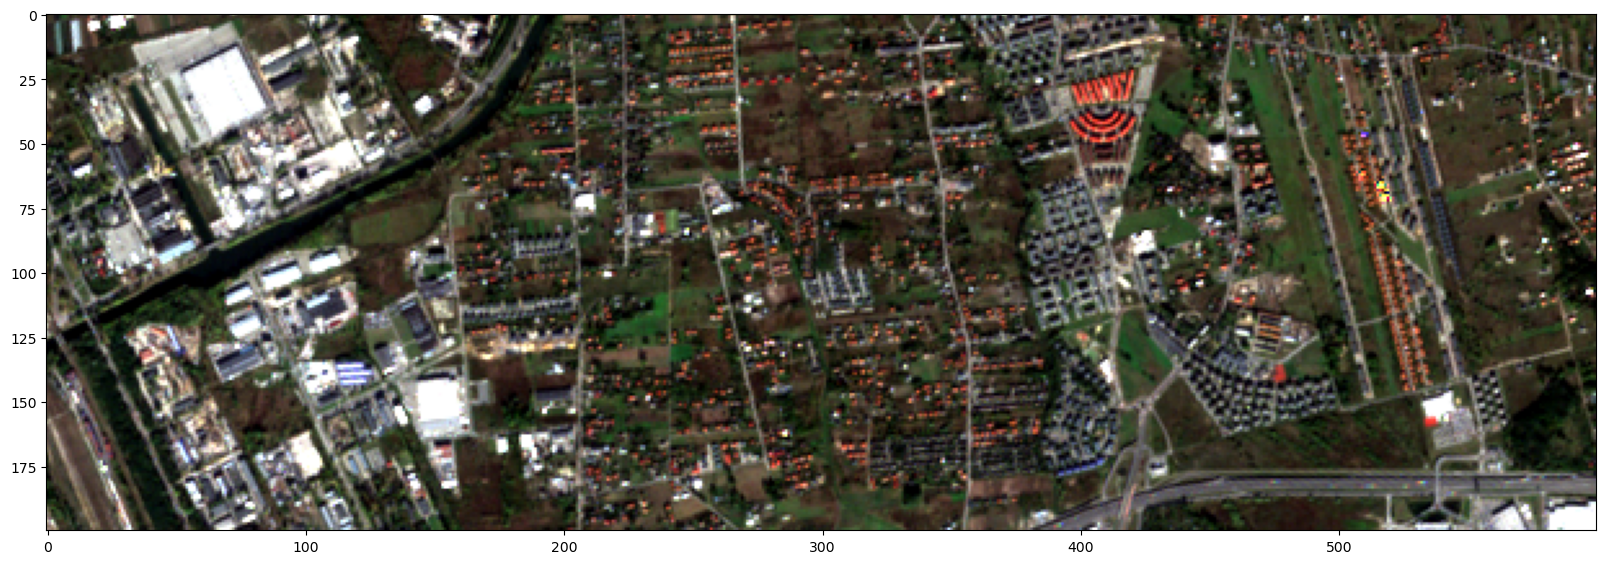

In [2]:
# visualisation of the image
import numpy as np
from skimage import exposure
from matplotlib import pyplot as plt

im_comp=np.dstack([coll[3], coll[2], coll[1]])
# print(im_comp)

# color composition
im_comp=np.dstack([coll[3]/coll[3].max(), coll[2]/coll[2].max(), coll[1]/coll[1].max()])
# print(im_comp)

# histogram equalization
for i in range(3):
    v_min, v_max = np.percentile(im_comp[:,:,i],(1,98))
    im_comp[:,:,i] = exposure.rescale_intensity(im_comp[:,:,i],in_range=(v_min,v_max))

plt.figure(figsize=(20,10))
plt.imshow(im_comp)
io.show()

In [3]:
# loading training data
p_water = np.loadtxt(r'C:\Users\shado\Desktop\WUT\Image Recognition and Deep Machine Learning\New project\data\water.txt',dtype='int')
print(p_water)
p_builtup = np.loadtxt(r'C:\Users\shado\Desktop\WUT\Image Recognition and Deep Machine Learning\New project\data\built-up.txt',dtype='int')
p_lveg = np.loadtxt(r'C:\Users\shado\Desktop\WUT\Image Recognition and Deep Machine Learning\New project\data\low_vegetation.txt',dtype='int')
p_trees = np.loadtxt(r'C:\Users\shado\Desktop\WUT\Image Recognition and Deep Machine Learning\New project\data\trees.txt',dtype='int')

[[ 59 143]
 [ 59 142]
 [ 32  35]
 [ 32  36]
 [ 29  34]
 [ 28  34]
 [ 29  33]
 [ 53 152]
 [ 53 153]
 [ 53 154]
 [ 54 152]
 [ 54 153]
 [ 54 154]
 [ 84  90]
 [ 83  90]
 [ 85  90]
 [ 83  91]
 [ 84  91]
 [ 85  91]
 [ 86  90]
 [ 87  90]
 [ 86  91]
 [ 87  91]
 [ 96  70]
 [ 97  70]
 [ 98  70]
 [ 96  69]
 [ 97  69]
 [ 98  69]
 [ 99  69]
 [100  69]
 [ 99  70]
 [100  70]
 [ 83  58]
 [ 83  59]
 [ 83  60]
 [ 84  59]
 [ 84  60]
 [ 20 184]
 [ 20 183]
 [ 20 182]
 [ 20 181]
 [ 20 180]
 [ 20 179]
 [ 21 179]
 [ 21 180]
 [ 21 181]
 [ 21 182]
 [ 21 183]
 [ 21 184]
 [ 38 168]
 [ 39 168]
 [ 40 168]
 [ 41 168]
 [ 42 168]
 [ 43 168]
 [ 38 169]
 [ 39 169]
 [ 40 169]
 [ 41 169]
 [ 42 169]
 [ 43 169]
 [ 38 170]
 [ 39 170]
 [ 40 170]
 [ 41 170]
 [ 42 170]
 [ 43 170]
 [ 48  42]
 [ 49  42]
 [ 50  42]
 [ 51  42]
 [ 48  43]
 [ 49  43]
 [ 50  43]
 [ 51  43]
 [ 52  43]
 [ 53  43]
 [ 97  60]
 [ 98  60]
 [ 99  60]
 [100  60]
 [101  60]
 [102  60]
 [103  60]
 [104  60]
 [105  60]
 [ 96  61]
 [ 97  61]
 [ 98  61]
 [ 99  61]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


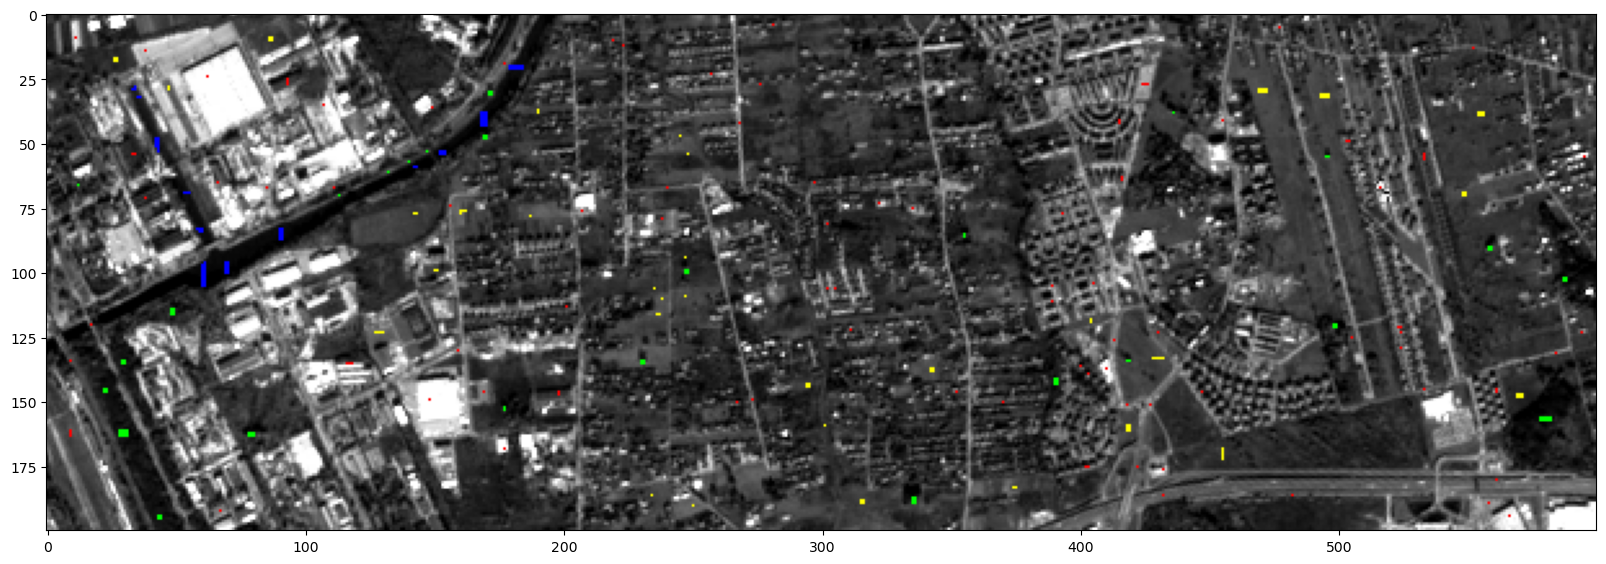

In [4]:
# visualisation of the training points

from skimage.color import rgb2gray
im_comp_p = np.zeros(im_comp.shape)
im_comp_p[:,:,0] = rgb2gray(im_comp)
im_comp_p[:,:,1] = rgb2gray(im_comp)
im_comp_p[:,:,2] = rgb2gray(im_comp)

# water
im_comp_p[p_water[:,0],p_water[:,1],0] = 0
im_comp_p[p_water[:,0],p_water[:,1],1] = 0
im_comp_p[p_water[:,0],p_water[:,1],2] = 255

# builtup
im_comp_p[p_builtup[:,0],p_builtup[:,1],0] = 255
im_comp_p[p_builtup[:,0],p_builtup[:,1],1] = 0
im_comp_p[p_builtup[:,0],p_builtup[:,1],2] = 0

# low vegetation
im_comp_p[p_lveg[:,0],p_lveg[:,1],0] = 255
im_comp_p[p_lveg[:,0],p_lveg[:,1],1] = 255
im_comp_p[p_lveg[:,0],p_lveg[:,1],2] = 0

# trees
im_comp_p[p_trees[:,0],p_trees[:,1],0] = 0
im_comp_p[p_trees[:,0],p_trees[:,1],1] = 255
im_comp_p[p_trees[:,0],p_trees[:,1],2] = 0

plt.figure(figsize=(20,10))
plt.imshow(im_comp_p)

## 2. Data transformation for supervised learning



In [5]:
# water

# step 1:
channels = []
for i in range(len(coll)):
    channel = np.asarray(coll[i].data)[p_water[:,0],p_water[:,1]]
    channels.append(channel)
    
# step 2:
X_water = np.stack(channels).T
print(X_water)
print(X_water.shape)

# built-up

# step 1:
channels = []
for i in range(len(coll)):
    channel = np.asarray(coll[i].data)[p_builtup[:,0],p_builtup[:,1]]
    channels.append(channel)
    
# step 2:
X_builtup = np.stack(channels).T


# low vegetation

# step 1:
channels = []
for i in range(len(coll)):
    channel = np.asarray(coll[i].data)[p_lveg[:,0],p_lveg[:,1]]
    channels.append(channel)
    
# step 2:
X_lveg = np.stack(channels).T


# trees

# step 1:
channels = []
for i in range(len(coll)):
    channel = np.asarray(coll[i].data)[p_trees[:,0],p_trees[:,1]]
    channels.append(channel)
    
# step 2:
X_trees = np.stack(channels).T

[[1460 1008  682 ...   13  427  224]
 [1460 1002  697 ...   13  427  224]
 [1600 1126  871 ...    9  610  374]
 ...
 [1553 1058  786 ...   12  356  209]
 [1477 1061  784 ...   10  492  317]
 [1477 1069  794 ...   10  492  317]]
(100, 13)


In [6]:
# stacking class tables in to one array

X = np.vstack((X_water,X_builtup,X_lveg,X_trees))
print(X)

n_water = np.ones((X_water.shape[0],1))
#print(n_water)
n_builtup = 2*np.ones((X_builtup.shape[0],1))
n_lveg = 3*np.ones((X_lveg.shape[0],1))
n_trees = 4*np.ones((X_trees.shape[0],1))

Y = np.vstack([n_water,n_builtup,n_lveg,n_trees])
print(Y)

[[1460 1008  682 ...   13  427  224]
 [1460 1002  697 ...   13  427  224]
 [1600 1126  871 ...    9  610  374]
 ...
 [1558 1188 1057 ...   13 1647  944]
 [1558 1184 1074 ...   13 1388  835]
 [1558 1189 1059 ...   13 1327  784]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.

## 3. Training a classifier

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

dt_clf = DecisionTreeClassifier(max_depth = 10)
dt_clf.fit(X,np.ravel(Y))

svm_clf = svm.SVC()
svm_clf.fit(X, np.ravel(Y))

SVC()

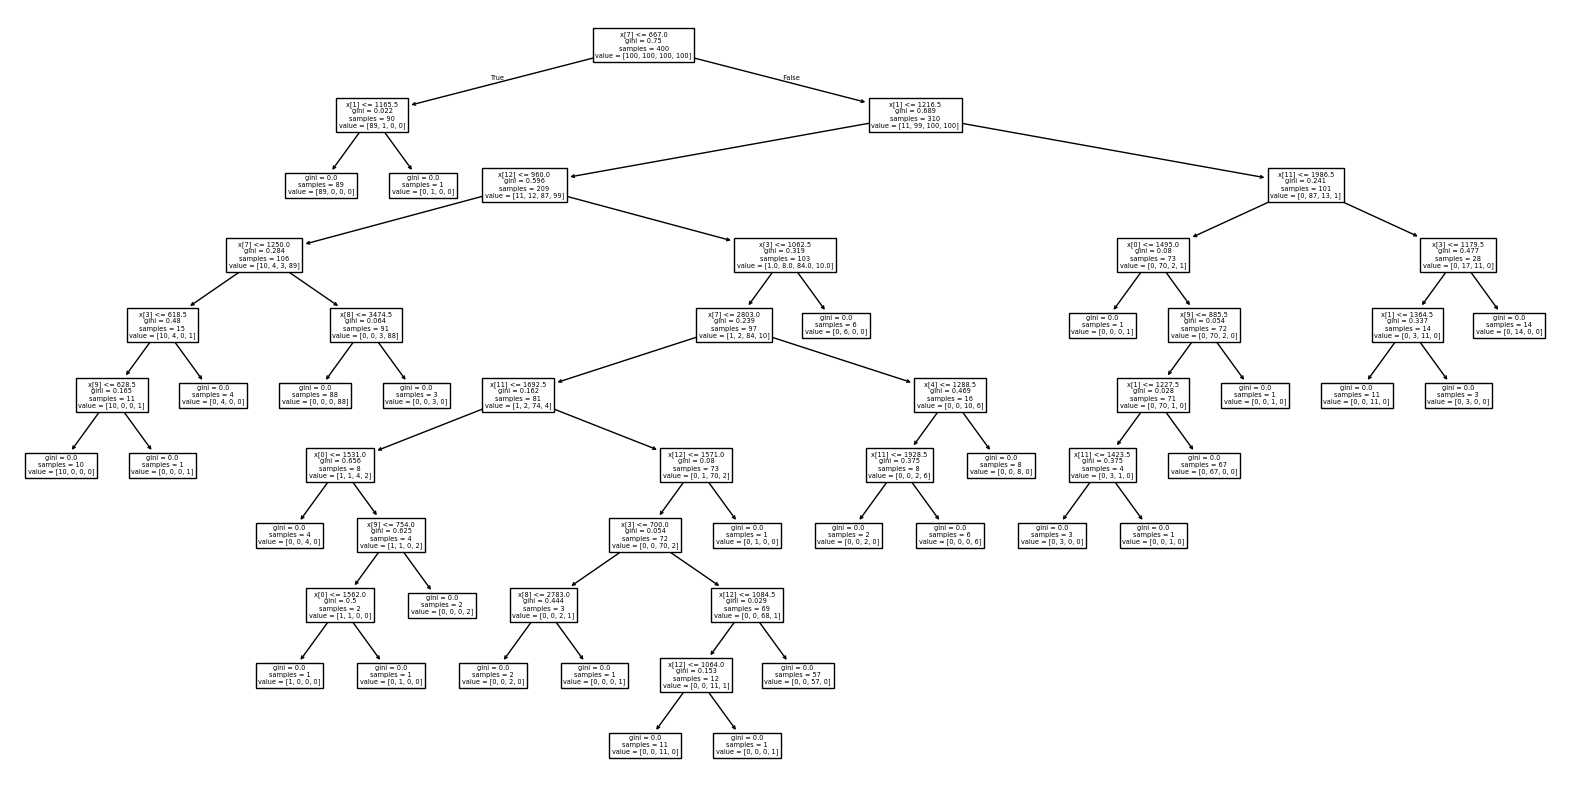

In [8]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_clf)
plt.show()

## 4. Transformation and classification of the whole image 

In [9]:
channels = []
for i in range(len(coll)):
    channel = np.asarray(coll[i].data).flatten()
    channels.append(channel)

X_all = np.stack(channels).T

In [10]:
from sklearn.cluster import KMeans , MiniBatchKMeans
from sklearn.mixture import GaussianMixture
# Apply K-Means clustering
n_clusters = 5  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_pred = kmeans.fit_predict(X_all)

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_pred = gmm.fit_predict(X_all)


# Apply MiniBatchKMeans clustering with increased batch_size
minibatch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, batch_size=2048)
minibatch_pred = minibatch_kmeans.fit_predict(X_all)


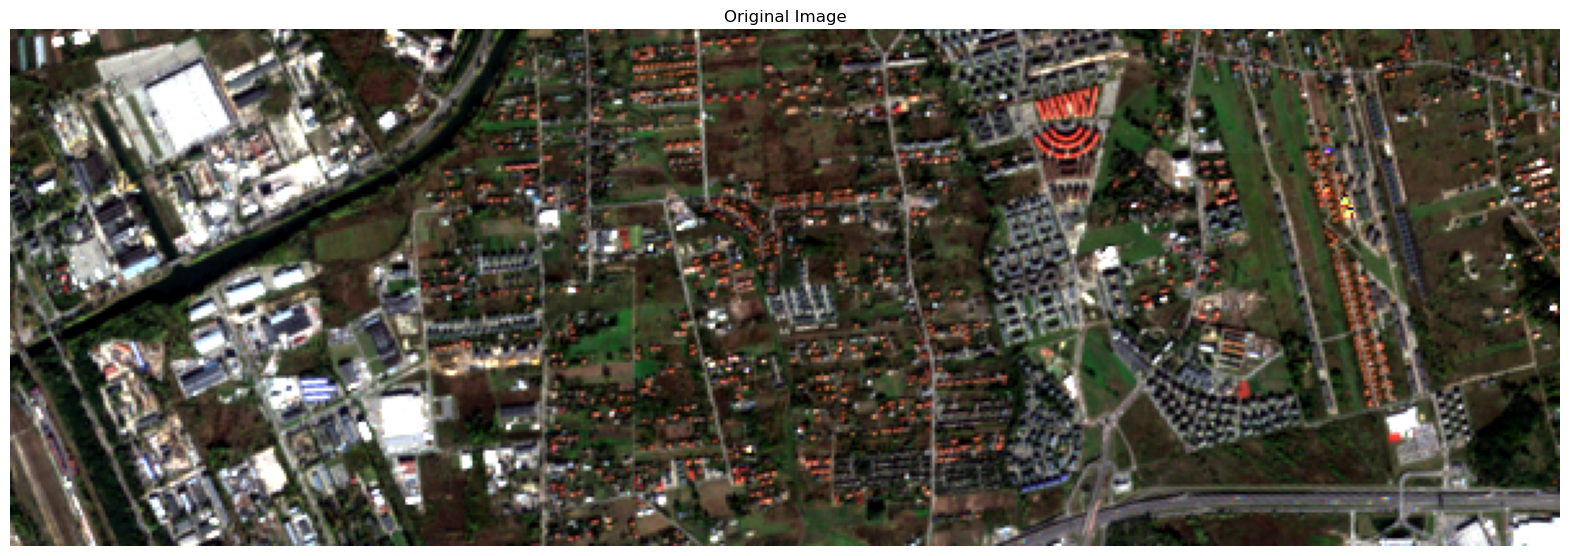

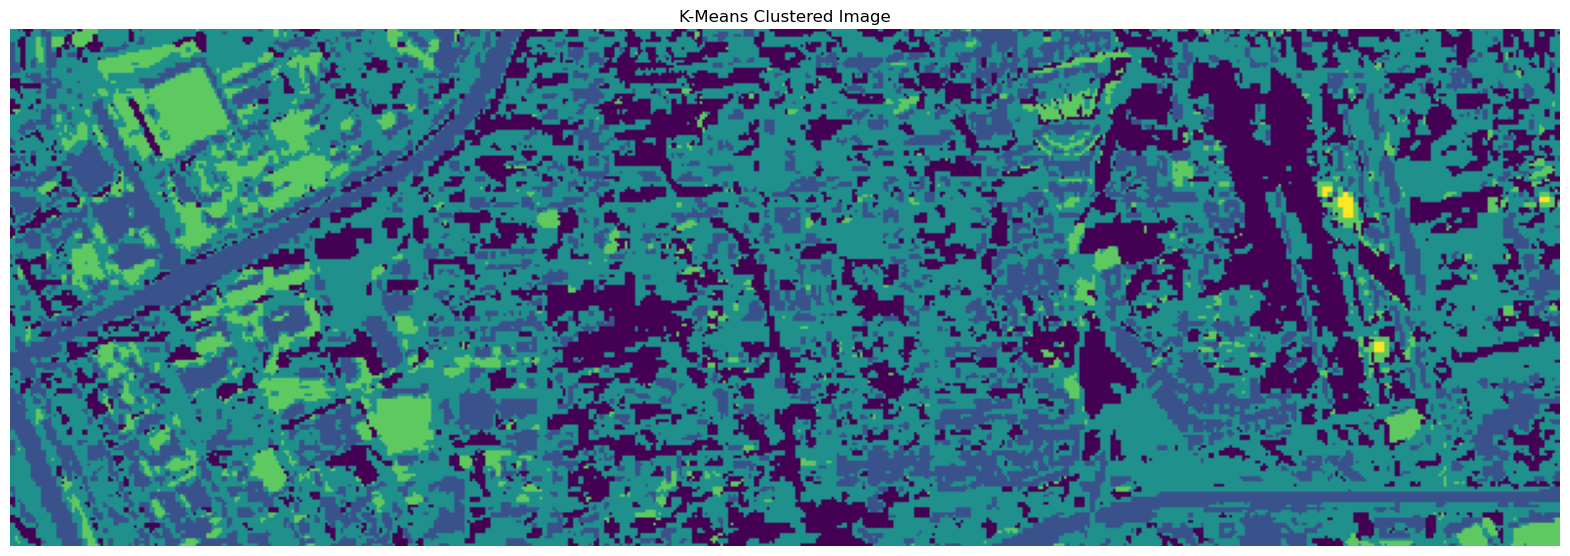

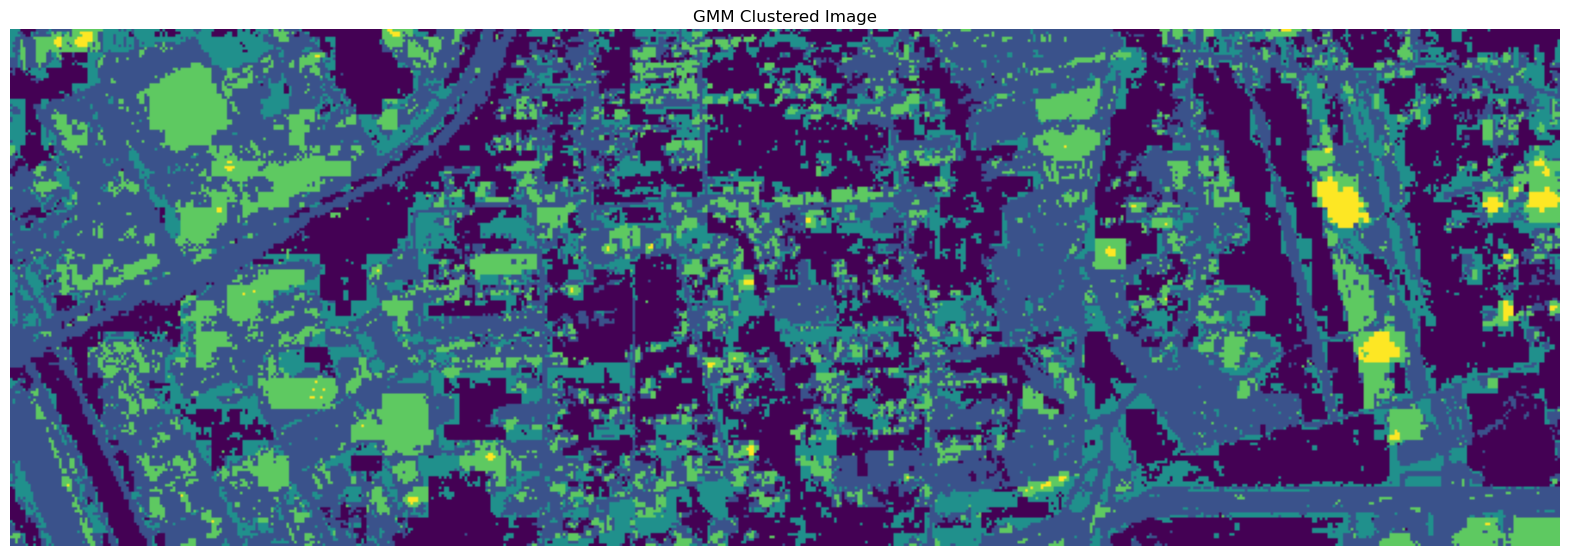

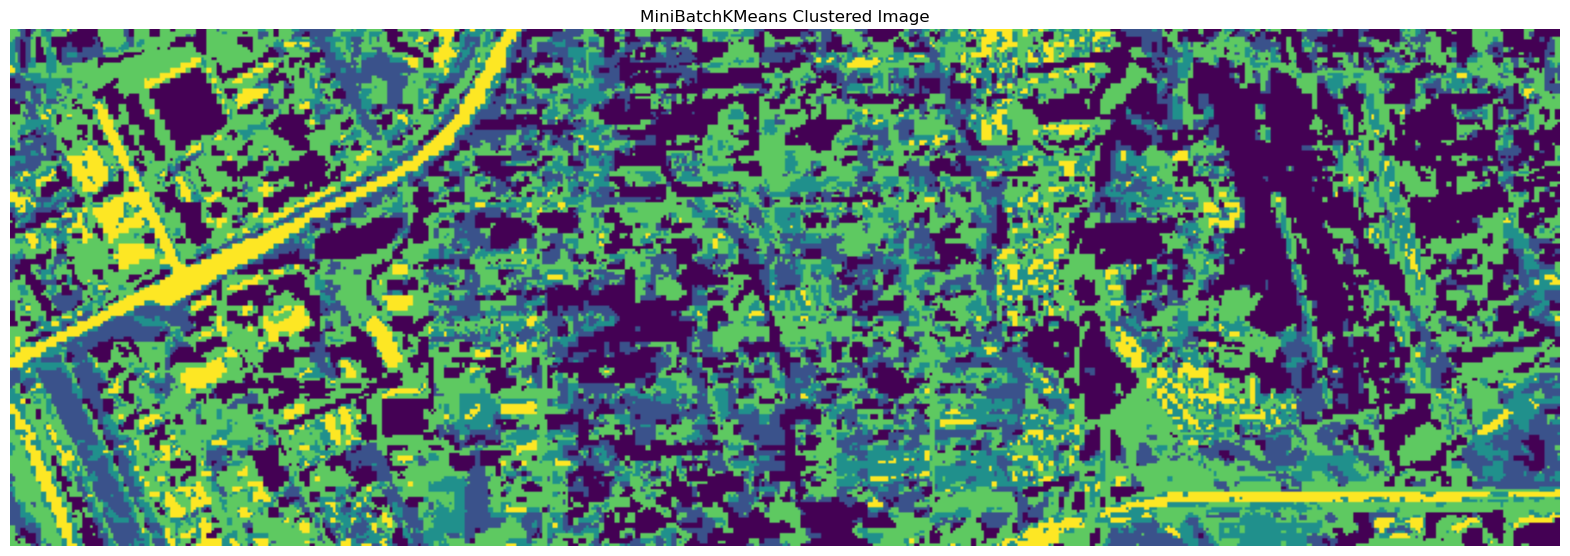

In [11]:
# Visualization of results

# Original image
plt.figure(figsize=(20, 10))
plt.imshow(im_comp)
plt.title("Original Image")
plt.axis("off")
plt.show()

# K-Means classified image
kmeans_pred_im = kmeans_pred.reshape(coll[0].shape)
plt.figure(figsize=(20, 10))
plt.imshow(kmeans_pred_im, cmap="viridis")
plt.title("K-Means Clustered Image")
plt.axis("off")
plt.show()

# GMM classified image
gmm_pred_im = gmm_pred.reshape(coll[0].shape)
plt.figure(figsize=(20, 10))
plt.imshow(gmm_pred_im, cmap="viridis")
plt.title("GMM Clustered Image")
plt.axis("off")
plt.show()

# MiniBatchKMeans classified image
minibatch_pred_im = minibatch_pred.reshape(coll[0].shape)
plt.figure(figsize=(20, 10))
plt.imshow(minibatch_pred_im, cmap="viridis")
plt.title("MiniBatchKMeans Clustered Image")
plt.axis("off")
plt.show()



-----
# Exercises 3
# Assessment of classification results

## 5. Loading and visualizing test/validation data


In [12]:
import numpy as np

p_val = np.loadtxt(r'C:\Users\shado\Desktop\WUT\Image Recognition and Deep Machine Learning\New project\data\test_points.txt',dtype='int')

p_val

array([[ 34, 163,   2],
       [145, 261,   2],
       [195, 540,   1],
       [ 16, 172,   4],
       [ 62, 279,   2],
       [ 31, 301,   2],
       [126, 465,   2],
       [194, 329,   3],
       [115, 508,   2],
       [120, 485,   2],
       [168, 123,   3],
       [ 97,  24,   2],
       [ 53, 319,   2],
       [ 24, 395,   2],
       [124, 351,   2],
       [  7, 435,   3],
       [ 99, 192,   2],
       [110, 264,   2],
       [155, 111,   4],
       [195, 255,   4],
       [196, 522,   3],
       [  0, 209,   3],
       [178, 442,   2],
       [114,  21,   4],
       [ 68, 230,   2],
       [184,  18,   2],
       [ 58, 406,   2],
       [151, 149,   2],
       [ 26,  36,   2],
       [ 81, 164,   3],
       [  7, 456,   2],
       [  5, 518,   3],
       [  6, 436,   3],
       [166, 557,   3],
       [135, 231,   4],
       [  2, 528,   3],
       [ 97, 461,   2],
       [175, 228,   3],
       [ 55, 536,   2],
       [108,  31,   4],
       [185, 404,   3],
       [  9, 591

In [13]:
# visualisation of test/validation points
def visualize_points(im_comp,p_val):
    # making color composition gray
    im_comp_p=np.zeros(im_comp.shape)
    im_comp_p[:,:,0]=rgb2gray(im_comp)
    im_comp_p[:,:,1]=rgb2gray(im_comp)
    im_comp_p[:,:,2]=rgb2gray(im_comp)

    # marking test/validation points with red crosses 
    im_comp_p[p_val[:,0],p_val[:,1],0] =1
    im_comp_p[p_val[:,0],p_val[:,1],1] =0
    im_comp_p[p_val[:,0],p_val[:,1],2] =0
    im_comp_p[p_val[:,0]+1,p_val[:,1],0] =1
    im_comp_p[p_val[:,0]+1,p_val[:,1],1] =0
    im_comp_p[p_val[:,0]+1,p_val[:,1],2] =0
    im_comp_p[p_val[:,0]-1,p_val[:,1],0] =1
    im_comp_p[p_val[:,0]-1,p_val[:,1],1] =0
    im_comp_p[p_val[:,0]-1,p_val[:,1],2] =0
    im_comp_p[p_val[:,0],p_val[:,1]+1,0] =1
    im_comp_p[p_val[:,0],p_val[:,1]+1,1] =0
    im_comp_p[p_val[:,0],p_val[:,1]+1,2] =0
    im_comp_p[p_val[:,0],p_val[:,1]-1,0] =1
    im_comp_p[p_val[:,0],p_val[:,1]-1,1] =0
    im_comp_p[p_val[:,0],p_val[:,1]-1,2] =0
    return im_comp_p

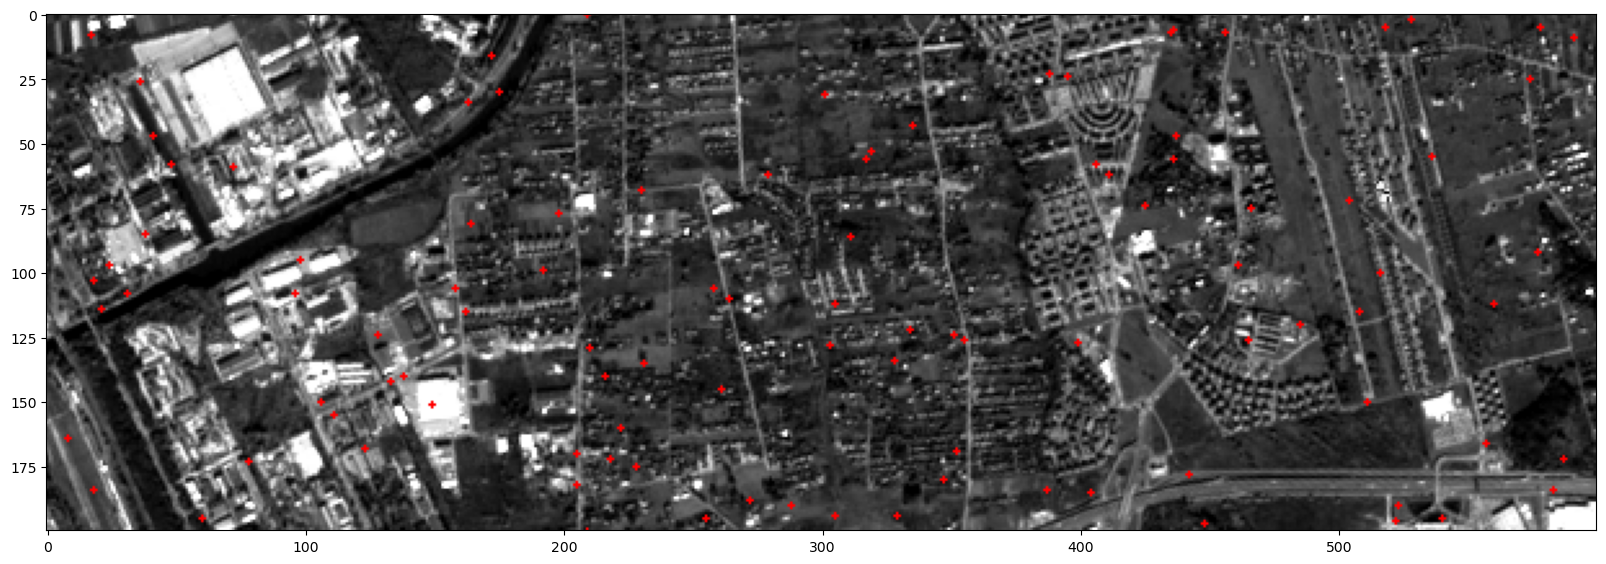

In [14]:
# displaying test/validation points

im_comp_pval = visualize_points(im_comp,p_val)

plt.figure(figsize=(20,10))
plt.imshow(im_comp_pval)

## 6. Classification results assessment (validation)

Overall accuracy K-Means Classification: 28.00%
**************************************************


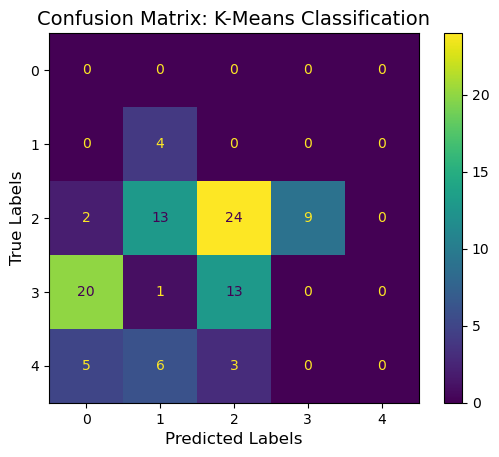

Overall accuracy GMM Classification: 5.00%
**************************************************


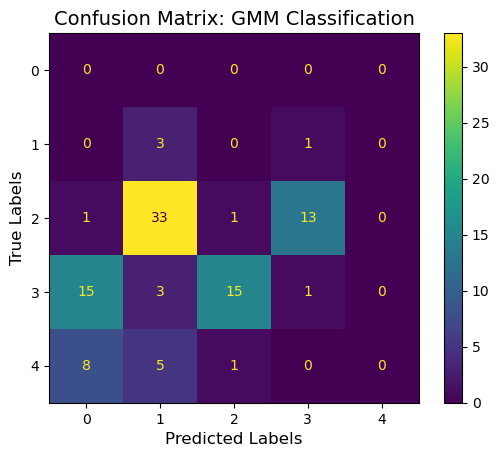

Overall accuracy MiniBatchKMeans Classification: 19.00%
**************************************************


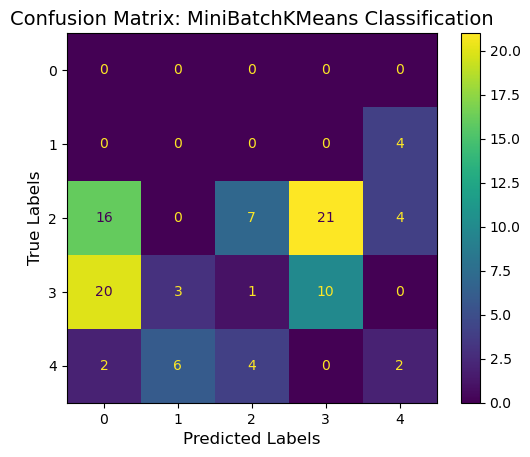

In [15]:
# Function to display overall accuracy and confusion matrix
def display_results(title, true_labels, predicted_labels):
    # Overall accuracy
    from sklearn.metrics import accuracy_score
    ovAcc = accuracy_score(true_labels, predicted_labels)
    print(f"Overall accuracy {title}: {ovAcc * 100:.2f}%")
    print("*"*50)
   
    
    # Confusion matrix
    from sklearn.metrics import confusion_matrix
    confM = confusion_matrix(true_labels, predicted_labels)
    
    # Visualization of the confusion matrix
    from sklearn.metrics import ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confM)
    disp.plot()  # Default color and behavior
    disp.ax_.set_title(f"Confusion Matrix: {title}", fontsize=14)
    disp.ax_.set_xlabel("Predicted Labels", fontsize=12)
    disp.ax_.set_ylabel("True Labels", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(False)
    plt.show()

# Reading classes of points from K-Means classification results
pred_val = kmeans_pred_im[p_val[:, 0], p_val[:, 1]]
display_results("K-Means Classification", p_val[:, 2], pred_val)

# Reading classes of points from GMM classification results
pred_val = gmm_pred_im[p_val[:, 0], p_val[:, 1]]
display_results("GMM Classification", p_val[:, 2], pred_val)

# Reading classes of points from MiniBatchKMeans classification results
pred_val = minibatch_pred_im[p_val[:, 0], p_val[:, 1]]
display_results("MiniBatchKMeans Classification", p_val[:, 2], pred_val)